<a href="https://colab.research.google.com/github/Soy1997/Image_Recognition__ML/blob/main/Image_recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -q kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soy1997","key":"eedd619481b4ded7bf3f866d9aba4955"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [9]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape} , Test shape: {x_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (60000, 28, 28) , Test shape: (60000, 28, 28)


In [10]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"Train reshaped : {x_train.shape} ")

Train reshaped : (60000, 28, 28, 1) 


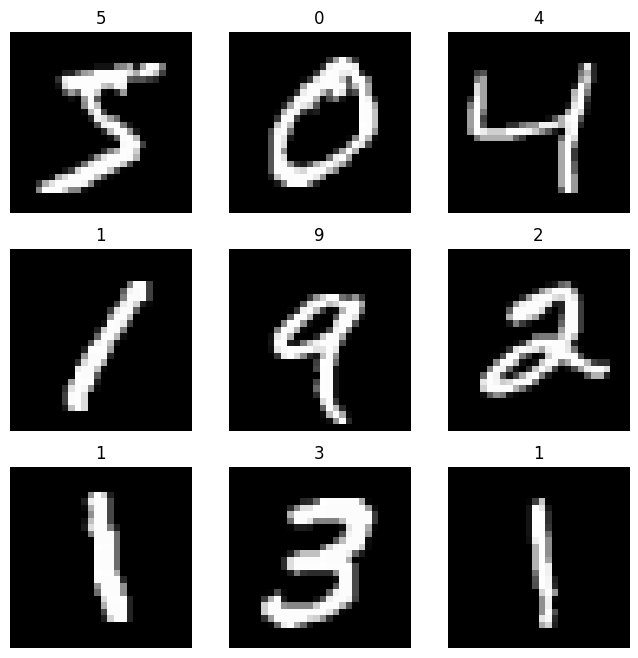

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.title(y_train[i])
  plt.axis("off")
plt.show()

In [12]:
(x_train_c10 , y_train_c10) , (x_test_c10 , y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 - x_train_c10 / 255.0
x_test_c10 - x_test_c10 / 255.0
print(f"CIFAR-10 train shape:{x_train_c10.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
CIFAR-10 train shape:(50000, 32, 32, 3)


#D2

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train,y_train,epochs=5, batch_size= 32 , validation_split= 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9009 - loss: 0.3326 - val_accuracy: 0.9818 - val_loss: 0.0625
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9839 - loss: 0.0514 - val_accuracy: 0.9850 - val_loss: 0.0500
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9893 - loss: 0.0331 - val_accuracy: 0.9875 - val_loss: 0.0433
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9862 - val_loss: 0.0495
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9942 - loss: 0.0165 - val_accuracy: 0.9903 - val_loss: 0.0358


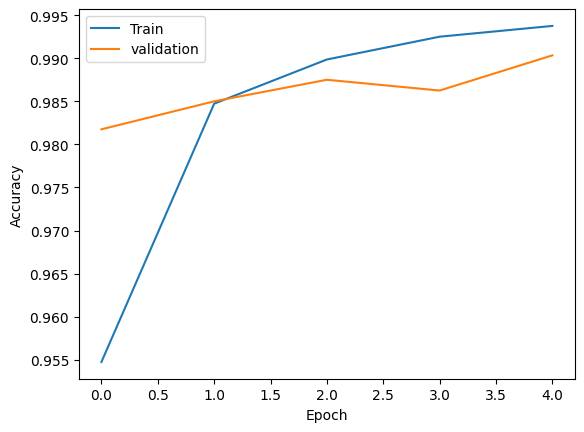

In [15]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Test Accuracy: {test_acc: .4f}")
y_pred = model.predict(x_test).argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9905 - loss: 0.0311
Test Accuracy: {test_acc: .4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


#D-3

In [18]:
# this is use to recognize image from all angle

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train_c10)


In [19]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.3186 - loss: 1.8674 - val_accuracy: 0.5145 - val_loss: 1.3365
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5076 - loss: 1.3774 - val_accuracy: 0.4714 - val_loss: 1.5839
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5725 - loss: 1.2130 - val_accuracy: 0.5977 - val_loss: 1.1578
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6046 - loss: 1.1355 - val_accuracy: 0.6495 - val_loss: 0.9940
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6272 - loss: 1.0687 - val_accuracy: 0.6443 - val_loss: 1.3246
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6460 - loss: 1.0256 - val_accuracy: 0.6428 - val_loss: 1.0995
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6573 - loss: 0.9953 - val_accuracy: 0.6725 - val_loss: 0.9591
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6642 - loss: 0.96

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.90      0.78      0.84      1000
           2       0.66      0.53      0.59      1000
           3       0.61      0.48      0.54      1000
           4       0.64      0.74      0.68      1000
           5       0.67      0.64      0.66      1000
           6       0.72      0.83      0.77      1000
           7       0.75      0.76      0.75      1000
           8       0.86      0.78      0.82      1000
           9       0.67      0.90      0.77      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



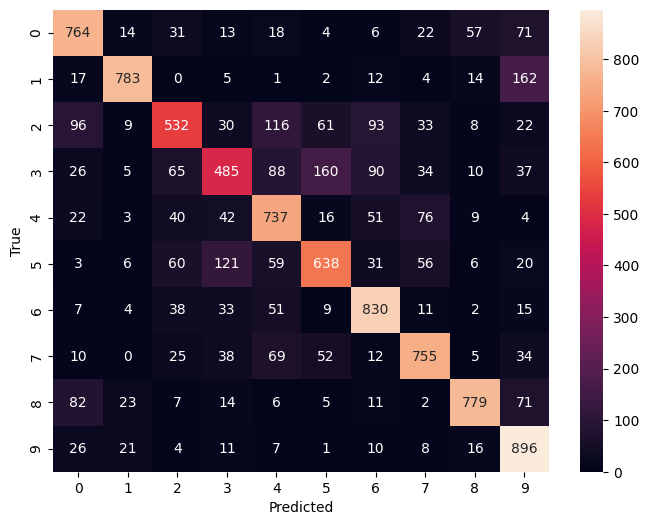

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
cm = confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#D4

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cat-and-dog


In [22]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 55% 120M/218M [00:00<00:00, 1.25GB/s]
100% 218M/218M [00:00<00:00, 795MB/s] 


In [23]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = datagen.flow_from_directory('/content/dogs-vs-cats', target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator = datagen.flow_from_directory('/content/dogs-vs-cats', target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable = False

model = Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 121ms/step - accuracy: 0.7859 - loss: 0.5386 - val_accuracy: 0.7985 - val_loss: 0.5105
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7999 - loss: 0.4949 - val_accuracy: 0.7975 - val_loss: 0.5255
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.8003 - loss: 0.4832 - val_accuracy: 0.7975 - val_loss: 0.5225
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8041 - loss: 0.4621 - val_accuracy: 0.7950 - val_loss: 0.5269
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8046 - loss: 0.4526 - val_accuracy: 0.7985 - val_loss: 0.5297


In [26]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 102s 235ms/step - accuracy: 0.7948 - loss: 0.5064 - val_accuracy: 0.7985 - val_loss: 0.5331
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.8102 - loss: 0.4410 - val_accuracy: 0.7985 - val_loss: 0.5334
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 117ms/step - accuracy: 0.8033 - loss: 0.4248 - val_accuracy: 0.7960 - val_loss: 0.5367


In [27]:
model.save('mobilenet_cats_dogs.h5')
import tensorflow as tf
loaded_model= tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step


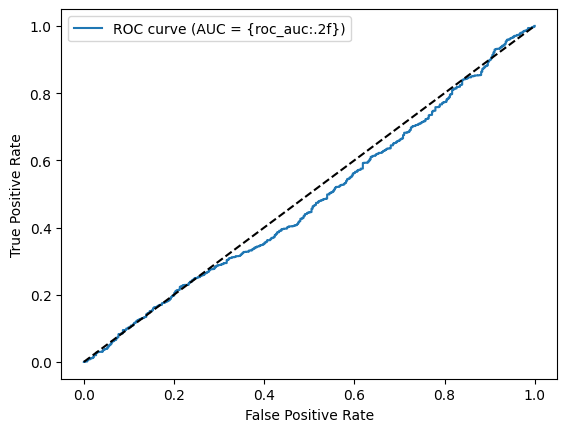

In [28]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = loaded_model.predict(val_generator)
fpr,tpr, _ = roc_curve(val_generator.classes,y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



#D5

In [35]:
from google.colab import files
uploaded=files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

image_path = 'GR.jpg.webp'
img = image.load_img(image_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print('predicted class:','dogs' if prediction[0][0]>0.5 else 'cat')

Saving GR.jpg.webp to GR.jpg (2).webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted class: dogs


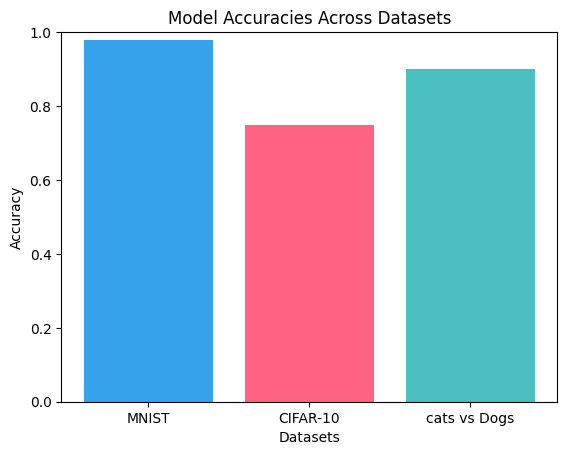

In [32]:
import matplotlib.pyplot as plt
datasets = ['MNIST','CIFAR-10','cats vs Dogs']
accuracies = [0.98,0.75,0.90]
plt.bar(datasets,accuracies,color=['#36A2EB','#FF6384','#4BC0C0'])
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Across Datasets')
plt.ylim(0,1)
plt.show()